<a href="https://colab.research.google.com/github/tankien76/CS331.L21/blob/main/CS331.L21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gg drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Data/Dataset.zip -d Dataset

In [3]:
# import library
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from imutils import paths
import os

import pandas as pd
import numpy as np

In [4]:
# define Alexnet Architecture
class Alexnet:
  def __init__(self, cs = 1000,  bp = "FC3"):
    self.classifer = cs
    self.breakPoint = bp
    self.model = None

  # setting model
  def define_model(self):
    model = Sequential()
    model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))

    # feature extraction in FC1
    if (self.breakPoint == "FC1"):
      self.model = model
      return

    model.add(Dropout(0.5))
    model.add(Dense(4096,activation='relu'))

    # feature extraction in FC2
    if (self.breakPoint == "FC2"):
      self.model = model
      return
    
    model.add(Dropout(0.5))
    model.add(Dense(self.classifer,activation='softmax'))
    self.model = model

  # predict 
  def predict(self, data):
    return self.model.predict(data)

  # get summary of model
  def summary(self):
    print(self.model.summary())

  # get model
  def get_model(self):
    return self.model

  # get/set break point
  def get_breakPoint(self):
    return self.breakPoint
  def set_breakPoint(self, bp):
    self.breakPoint = bp

  # get/set class
  def get_class(self):
    return self.classifer
  def set_class(self, c):
    self.classifer = c

In [5]:
# get feature from model
def getFeature(imagePath, model):
  # preprocess image
  image = load_img(imagePath,target_size=(227,227))
  img_array = img_to_array(image)
  img_array = np.expand_dims(img_array, axis=0)

  # get feature 
  feature = model.predict(img_array)
  feature = feature.reshape(-1)

  return feature

In [6]:
# feature extraction
def featureExtraction(imageDir, model):
  imagePaths = list(paths.list_images(imageDir))

  features = []
  labels = []

  for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    features.append(getFeature(imagePath,model))

    if (label == "with_mask"):
      labels.append(1)
      
    else:
      labels.append(0)

  return np.array(features),np.array(labels)

In [7]:
# main function
if __name__ ==  "__main__":
  pathDir = '/content/Dataset'

  # setting model
  model = Alexnet(cs=2,bp="FC1")
  model.define_model()
  model.summary()

  # feature extraction
  # FC1
  features_1 , labels_1 = featureExtraction(pathDir, model)

  # FC2
  model.set_breakPoint(bp="FC2")
  model.define_model()
  model.summary()
  features_2, labels_2 = featureExtraction(pathDir, model)

  # # show 
  # print(dt_feature)
  # print(dataset.shape)

  # print(dataset2)
  # print(dataset.shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

In [8]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [14]:
feature_FC1 = features_1
feature_FC2 = features_2

labels_FC1 = labels_1
labels_FC2 = labels_2

#print(feature_FC1)
#print(feature_FC2)

In [10]:
#Tiến hành chia dữ liệu để thực hiện quá trình ra 2 phần train và test.
feature_FC1_train, feature_FC1_test, labels_FC1_train, labels_FC1_test = train_test_split(feature_FC1, labels_FC1, test_size = 0.2, random_state = 1)
feature_FC2_train, feature_FC2_test, labels_FC2_train, labels_FC2_test = train_test_split(feature_FC2, labels_FC2, test_size = 0.2, random_state = 1)

              precision    recall  f1-score   support

           0       0.70      0.89      0.78        18
           1       0.88      0.68      0.77        22

    accuracy                           0.78        40
   macro avg       0.79      0.79      0.77        40
weighted avg       0.80      0.78      0.77        40

Confusion matrix:
[[16  7]
 [ 2 15]]


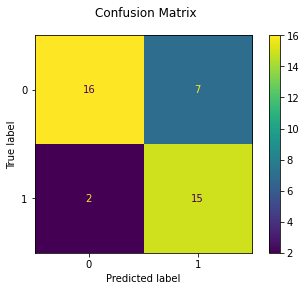

In [11]:
# tạo một bộ phân loại.
clf_FC1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))

clf_FC1.fit(feature_FC1_train, labels_FC1_train)
predicted_FC1 = clf_FC1.predict(feature_FC1_test)
print(classification_report(predicted_FC1, labels_FC1_test))

# Confusion matrix
conf_FC1 = metrics.plot_confusion_matrix(clf_FC1, feature_FC1_test, labels_FC1_test)
conf_FC1.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{conf_FC1.confusion_matrix}")
plt.show()

              precision    recall  f1-score   support

           0       0.57      0.81      0.67        16
           1       0.82      0.58      0.68        24

    accuracy                           0.68        40
   macro avg       0.69      0.70      0.67        40
weighted avg       0.72      0.68      0.68        40

Confusion matrix:
[[13 10]
 [ 3 14]]


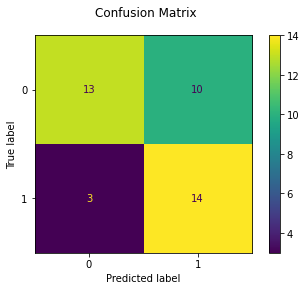

In [12]:
# tạo một bộ phân loại.
clf_FC2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))

clf_FC2.fit(feature_FC2_train, labels_FC2_train)
predicted_FC2 = clf_FC2.predict(feature_FC2_test)
print(classification_report(predicted_FC2, labels_FC2_test))

# Confusion matrix
conf_FC2 = metrics.plot_confusion_matrix(clf_FC2, feature_FC2_test, labels_FC2_test)
conf_FC2.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{conf_FC2.confusion_matrix}")
plt.show()